# CatBoosting Used Cars

## Reading data and imports

In [4]:
import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import numpy as np

cars = pd.read_csv('../datasets/used_cars_tratado.csv')

## Modeling

In [5]:
from sklearn.model_selection import train_test_split
X = cars.drop('Price', axis=1)
y = cars['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

In [6]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor

catboost_model = CatBoostRegressor(random_state=2024)

params =  {
    'iterations': [10, 50], 'depth': list(range(1,14)), 'learning_rate': [0.05, 0.1]
}

grid = GridSearchCV(estimator=catboost_model,
                    param_grid=params,
                    cv=5,
                    n_jobs=5,
                    verbose=2)

grid.fit(X_train, y_train)
grid.best_score_, grid.best_params_

Fitting 5 folds for each of 52 candidates, totalling 260 fits
0:	learn: 2628196.1524412	total: 19.6ms	remaining: 960ms
1:	learn: 2413087.6571140	total: 41.2ms	remaining: 990ms
2:	learn: 2220793.1426522	total: 64.1ms	remaining: 1s
3:	learn: 2038914.3228034	total: 86.2ms	remaining: 991ms
4:	learn: 1884194.3341782	total: 108ms	remaining: 972ms
5:	learn: 1742483.4045520	total: 127ms	remaining: 933ms
6:	learn: 1612489.4340938	total: 148ms	remaining: 911ms
7:	learn: 1497354.9647470	total: 167ms	remaining: 879ms
8:	learn: 1395240.9233035	total: 190ms	remaining: 868ms
9:	learn: 1305949.6391751	total: 211ms	remaining: 845ms
10:	learn: 1222863.5380122	total: 231ms	remaining: 818ms
11:	learn: 1145527.4565235	total: 259ms	remaining: 819ms
12:	learn: 1078577.1659273	total: 281ms	remaining: 800ms
13:	learn: 1019713.7446518	total: 300ms	remaining: 772ms
14:	learn: 967207.7120833	total: 322ms	remaining: 752ms
15:	learn: 917832.4211774	total: 342ms	remaining: 727ms
16:	learn: 875166.5208124	total: 362m

(0.9447583485762706, {'depth': 10, 'iterations': 50, 'learning_rate': 0.1})

In [7]:
from sklearn import metrics
grid_predictions = grid.predict(X_test)

print('MAE: ', metrics.mean_absolute_error(y_test, grid_predictions))
print('MSE: ', metrics.mean_squared_error(y_test, grid_predictions))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, grid_predictions)))

MAE:  214617.50332635117
MSE:  410888318351.52936
RMSE:  641005.7085171156


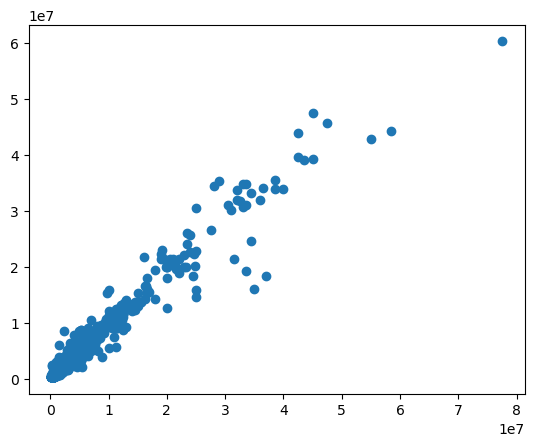

In [9]:
plt.scatter(y_test, grid_predictions)